<p style="font-family: Arial; font-size:1.9em;color:red; font-style:bold"><br>
    Default of credit card clients

## Chargemment des bibliothèques

In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,mean_squared_error
from sklearn import metrics
from catboost import CatBoostClassifier

## Description de la base

In [107]:
data=pd.read_excel('default of credit card clients.xls',index_col=0,skiprows=1)

In [108]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [110]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [111]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [112]:
#data.shape
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 24 columns


In [113]:
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### Quelques modifications

In [114]:
data.rename(columns={'default payment next month':'dpnm'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [116]:
print(np.unique(data['MARRIAGE']))

[0 1 2 3]


In [117]:
print(np.unique(data['AGE'])) #de 21 à 79

[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 79]


In [118]:
print(f'Unique values of Education columns are:',np.unique(data['EDUCATION']))

Unique values of Education columns are: [0 1 2 3 4 5 6]


In [119]:
#cherche les nAn
data.isna().sum()

#pas de nAn

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

### Nettoyage

In [120]:
#data.drop(['ID'], axis=1, inplace=True)

In [121]:
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(0,5)

In [122]:
data=data[data['EDUCATION'] <=4]
data=data[data['EDUCATION'] >=1]

In [123]:
data=data[data['MARRIAGE'] >0]

In [124]:
data.dpnm.value_counts()

0    22996
1     6605
Name: dpnm, dtype: int64

In [125]:
data.shape

(29601, 24)

### DEFAULT 

In [126]:
data['dpnm'].value_counts()

0    22996
1     6605
Name: dpnm, dtype: int64

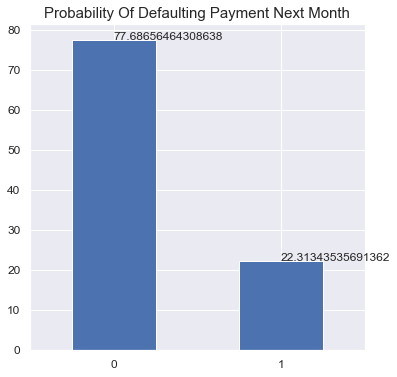

In [127]:
def_cnt = (data.dpnm.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

#zip = fonction qui joint deux rangers

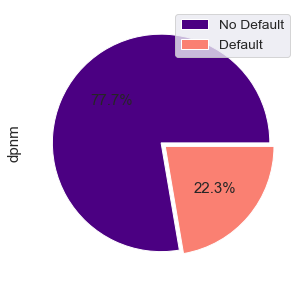

In [128]:
plt.figure(figsize=(7,5))

data['dpnm'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

<frame  > la dataset n'est pas équilibré, le nombre de 0 (no default) dépasse le nombre de 1 (default).                                                               </frame>

### AGE 

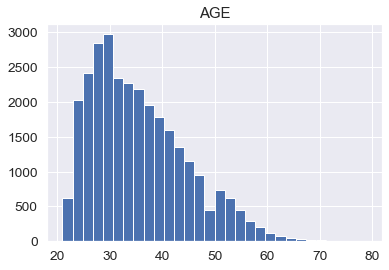

In [129]:
data.hist(column='AGE',bins=30);
#data.hist(column='AGE', bins=30, orientation='horizontal' );

<frame  >
les clients qui sont entre 20 et 30 ans sont plus nombreux que les autres 
</frame> 

In [130]:
data['AGE_BIN'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AGE_BIN'].value_counts())

(25, 30]    7072
(40, 50]    5906
(30, 35]    5720
(35, 40]    4844
(20, 25]    3827
(50, 60]    1963
(60, 80]     269
Name: AGE_BIN, dtype: int64


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  29601 non-null  int64   
 1   SEX        29601 non-null  int64   
 2   EDUCATION  29601 non-null  int64   
 3   MARRIAGE   29601 non-null  int64   
 4   AGE        29601 non-null  int64   
 5   PAY_1      29601 non-null  int64   
 6   PAY_2      29601 non-null  int64   
 7   PAY_3      29601 non-null  int64   
 8   PAY_4      29601 non-null  int64   
 9   PAY_5      29601 non-null  int64   
 10  PAY_6      29601 non-null  int64   
 11  BILL_AMT1  29601 non-null  int64   
 12  BILL_AMT2  29601 non-null  int64   
 13  BILL_AMT3  29601 non-null  int64   
 14  BILL_AMT4  29601 non-null  int64   
 15  BILL_AMT5  29601 non-null  int64   
 16  BILL_AMT6  29601 non-null  int64   
 17  PAY_AMT1   29601 non-null  int64   
 18  PAY_AMT2   29601 non-null  int64   
 19  PAY_AMT3   29601 non-null

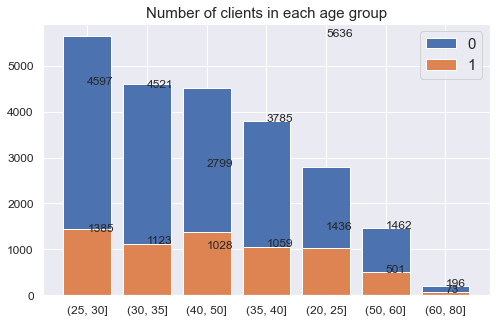

In [132]:
bins = [20, 25, 30, 35, 40, 50, 60, 80]
names = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

#age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['dpnm'] == 0].value_counts()) #clients with no default payment
age_1 = (data.AGE_BIN[data['dpnm'] == 1].value_counts()) #clients with default payment

plt.subplots(figsize=(8,5))
# sns.barplot(data=data, x='AGE_BIN', y='LIMIT_BAL', hue='dpnm', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

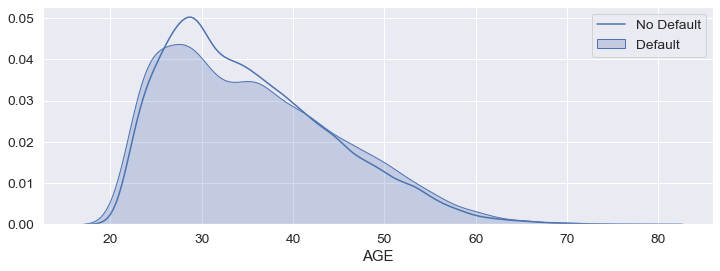

In [133]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['dpnm'] == 0), 'AGE'], label = 'No Default', shade = False)
sns.kdeplot(data.loc[(data['dpnm'] == 1), 'AGE'], label = 'Default', shade = True )
plt.ylabel('')
plt.legend()
plt.show()

#densité 

<frame  >
Les clients qui sont entre 25 ans et 40 ans sont plus suceptibles d'avoir un paiment sans défaut le mois prochain
</frame> 

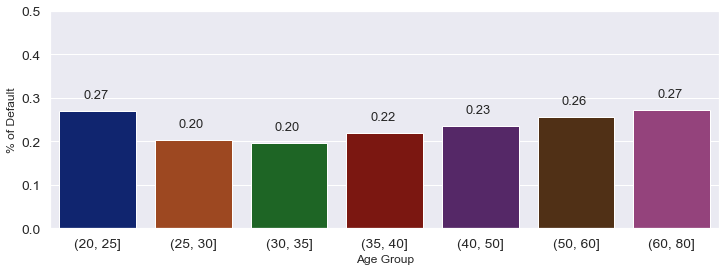

In [134]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AGE_BIN", y = "dpnm", data = data, palette = 'dark', ci = None, order = names)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

<frame>
les probabilités de défaut les plus faibles sont chez les clients entre 25 et 35 ans.
Aors que les probabilités de défaut les plus élevés sont chez les clients entre 20 et 25 ans mais aussi ceux de 60 ans ou plus 
</frame>

### SEX

In [135]:
data.SEX.value_counts()

2    17855
1    11746
Name: SEX, dtype: int64

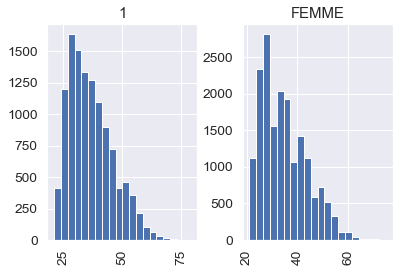

In [136]:
import matplotlib.pyplot as plt
#data['AGE'].plot.kde();
#histogrammes de l'âge selon le sexe
data.hist(column='AGE',by='SEX',bins=20);
plt.title('FEMME');

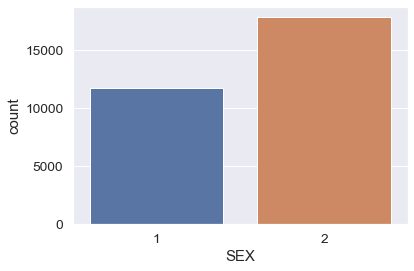

In [137]:
sns.countplot(x='SEX', data=data)
plt.show()

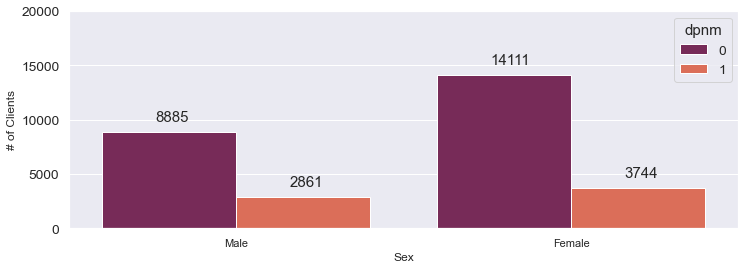

In [138]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'SEX', hue="dpnm", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

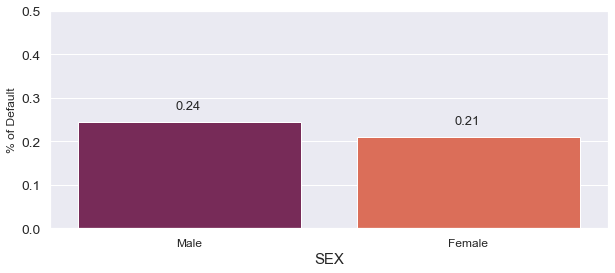

In [139]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "dpnm", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

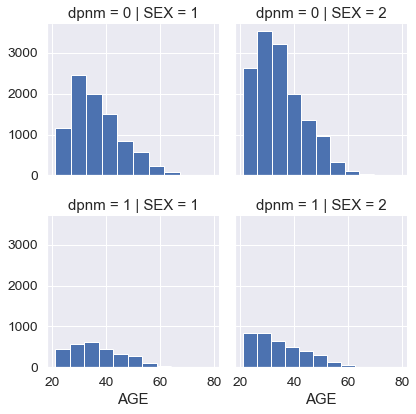

In [140]:
g = sns.FacetGrid(data, row='dpnm', col='SEX')
g = g.map(plt.hist, 'AGE')

<frame>
On peut voir que les femmes du groupe d'âge 20-30 ont une tendance très élevée aux défauts de paiement par rapport aux hommes de toutes les tranches d'âge.

Par conséquent, nous pouvons conserver la colonne SEXE des clients pour prédire la probabilité de défaut de paiement.


</frame>

### MARRIAGE

In [141]:
# (1=married, 2=single, 3=others)
data['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

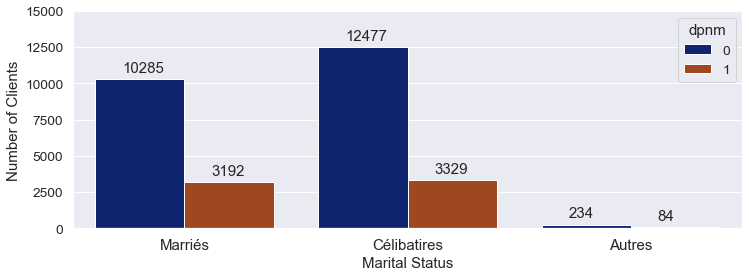

In [142]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'MARRIAGE', hue="dpnm", palette = 'dark')

plt.xlabel("Marital Status", fontsize= 15)
plt.ylabel("Number of Clients", fontsize= 15)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Marriés', 'Célibatires', 'Autres'], fontsize = 15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))
plt.show()

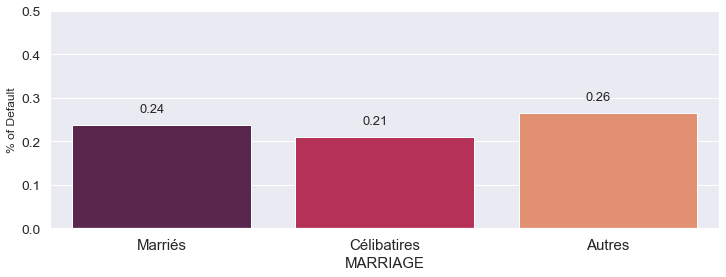

In [143]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "dpnm", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Marriés', 'Célibatires', 'Autres'], fontsize = 15)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

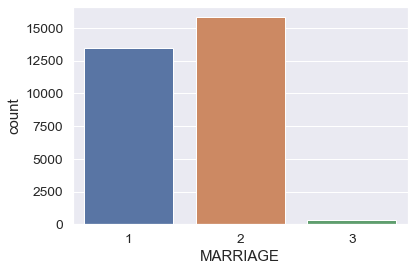

In [144]:
sns.countplot(x='MARRIAGE', data=data)
plt.show()

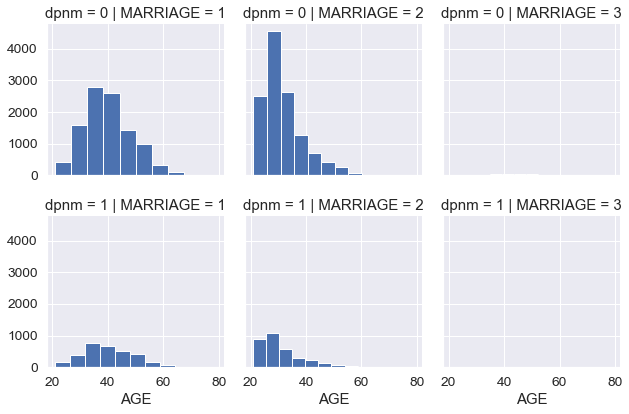

1=MARIE, 2=CELIBATAIRE, 3=AUTRES


In [145]:
g = sns.FacetGrid(data, row='dpnm', col='MARRIAGE')#pour visualiser la distribution de la variable dpnm avec d'autres sous-ensembles
g = g.map(plt.hist, 'AGE')
plt.show()

print("1=MARIE, 2=CELIBATAIRE, 3=AUTRES");

<frame> 
On remarque que les personnes mariées entre 30 et 50 ans ainsi que les célibataires de 20 à 30 ans ont tendance à faire défaut de paiement.


Les clients non mariés ont une probabilité plus élevé de défaut de paiement.

=> Par conséquent, nous pouvins inclure la fonction MARRIAGE des clients pour trouver la probabilté de défaut de paiement. 


</frame>

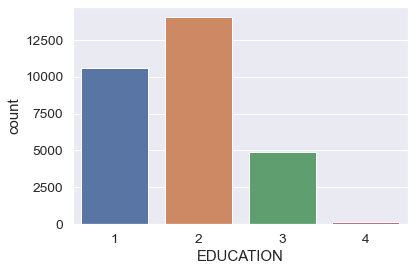

In [146]:
sns.countplot(x='EDUCATION', data=data)
plt.show()

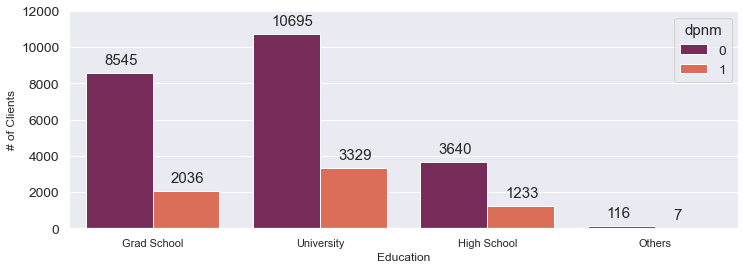

In [147]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'EDUCATION', hue="dpnm", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

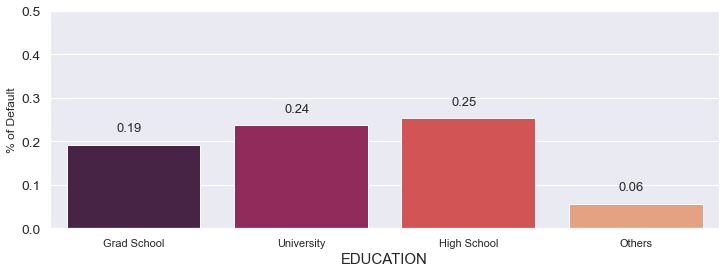

In [148]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "dpnm", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

<frame>
Le niveau d'éducation prédominant dans notre ensemble de données est :

1-« Université »
2-« École supérieure »
3-« Lycée »
4-« Autres »


En ne considérant que les trois premiers niveaux, il semble qu'une éducation supérieure "Grad School" se traduise par une moindre chance d'échec.

Cependant, le niveau « Autres » (dont nous présumons que cela signifie un niveau inférieur à celui du secondaire), ont une probabilité sensiblement plus faible.


</frame>

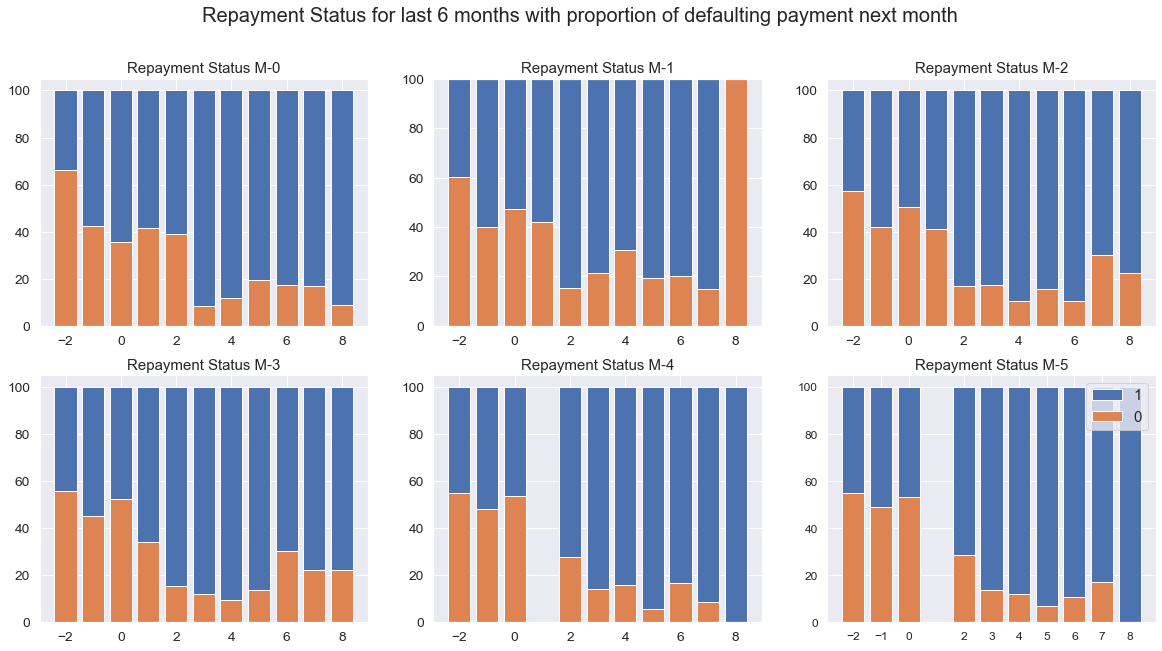

In [149]:
 #payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.
plt.subplots(figsize=(20,10))

ind = sorted(data.PAY_1.unique())
pay_0 = (data.PAY_1[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_1[data['dpnm'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(data.PAY_2.unique())
pay_0 = (data.PAY_2[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_2[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(data.PAY_3.unique())
pay_0 = (data.PAY_3[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_3[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(data.PAY_4.unique())
pay_0 = (data.PAY_4[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_4[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(data.PAY_5.unique())
pay_0 = (data.PAY_5[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_5[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(data.PAY_6.unique())
pay_0 = (data.PAY_6[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_6[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

<frame>
Le graphique ci-dessus nous montre la proportion de clients qui feront défaut de paiement le mois prochain en fonction de l'historique de remboursement.

=>Pour le statut du mois en cours, plus le paiement est effectué tôt, moins il y a de chances que ces clients fassent défaut de paiement.

</frame>

<frame>
Nous allons maintenant vérifier si le montant de la facture des six derniers mois affectera ou non le défaut de paiement le mois prochain :
</frame>

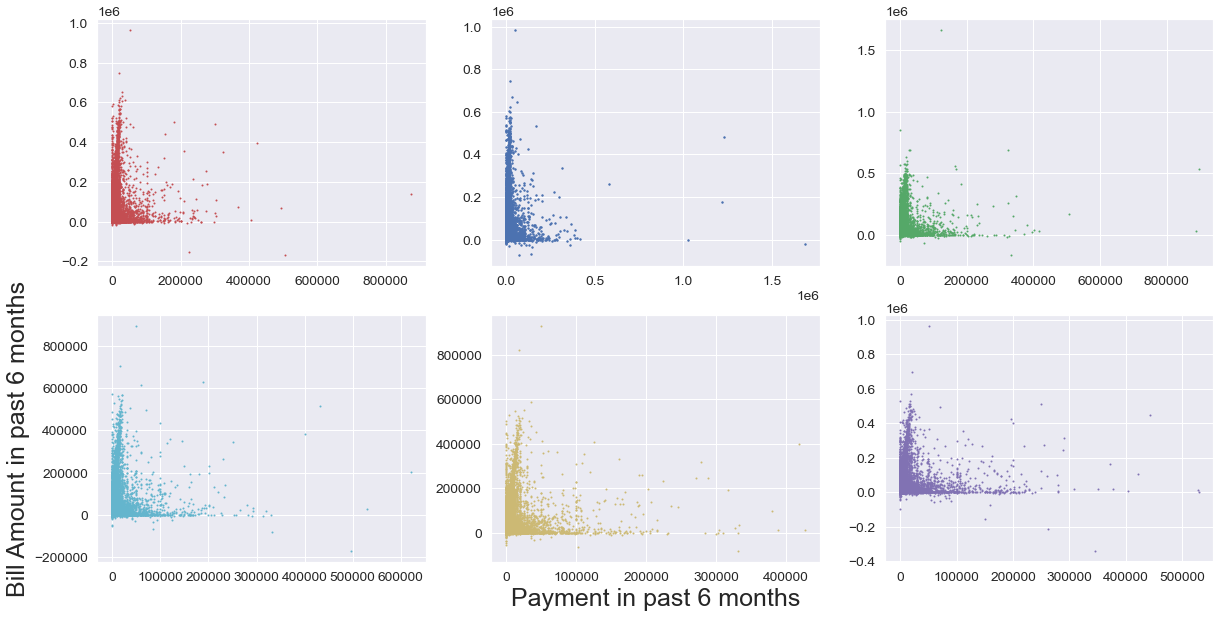

In [150]:
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)#2 lignes, 3 colonnes et index=1
plt.scatter(x=data.PAY_AMT1, y=data.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=data.PAY_AMT2, y=data.BILL_AMT2, c='b', s=2)

plt.subplot(233)
plt.scatter(x=data.PAY_AMT3, y=data.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=data.PAY_AMT4, y=data.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=data.PAY_AMT5, y=data.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=data.PAY_AMT6, y=data.BILL_AMT6, c='m', s=1)

plt.show()

<frame>
Le graphique ci-dessus indique qu'il y a une proportion plus élevée de clients pour lesquels le montant de la facture est élevé mais le paiement effectué contre celui-ci est très faible.

Le nombre maximum de points de données est étroitement emballé le long de l'axe Y près de 0 sur l'axe X.



</frame>

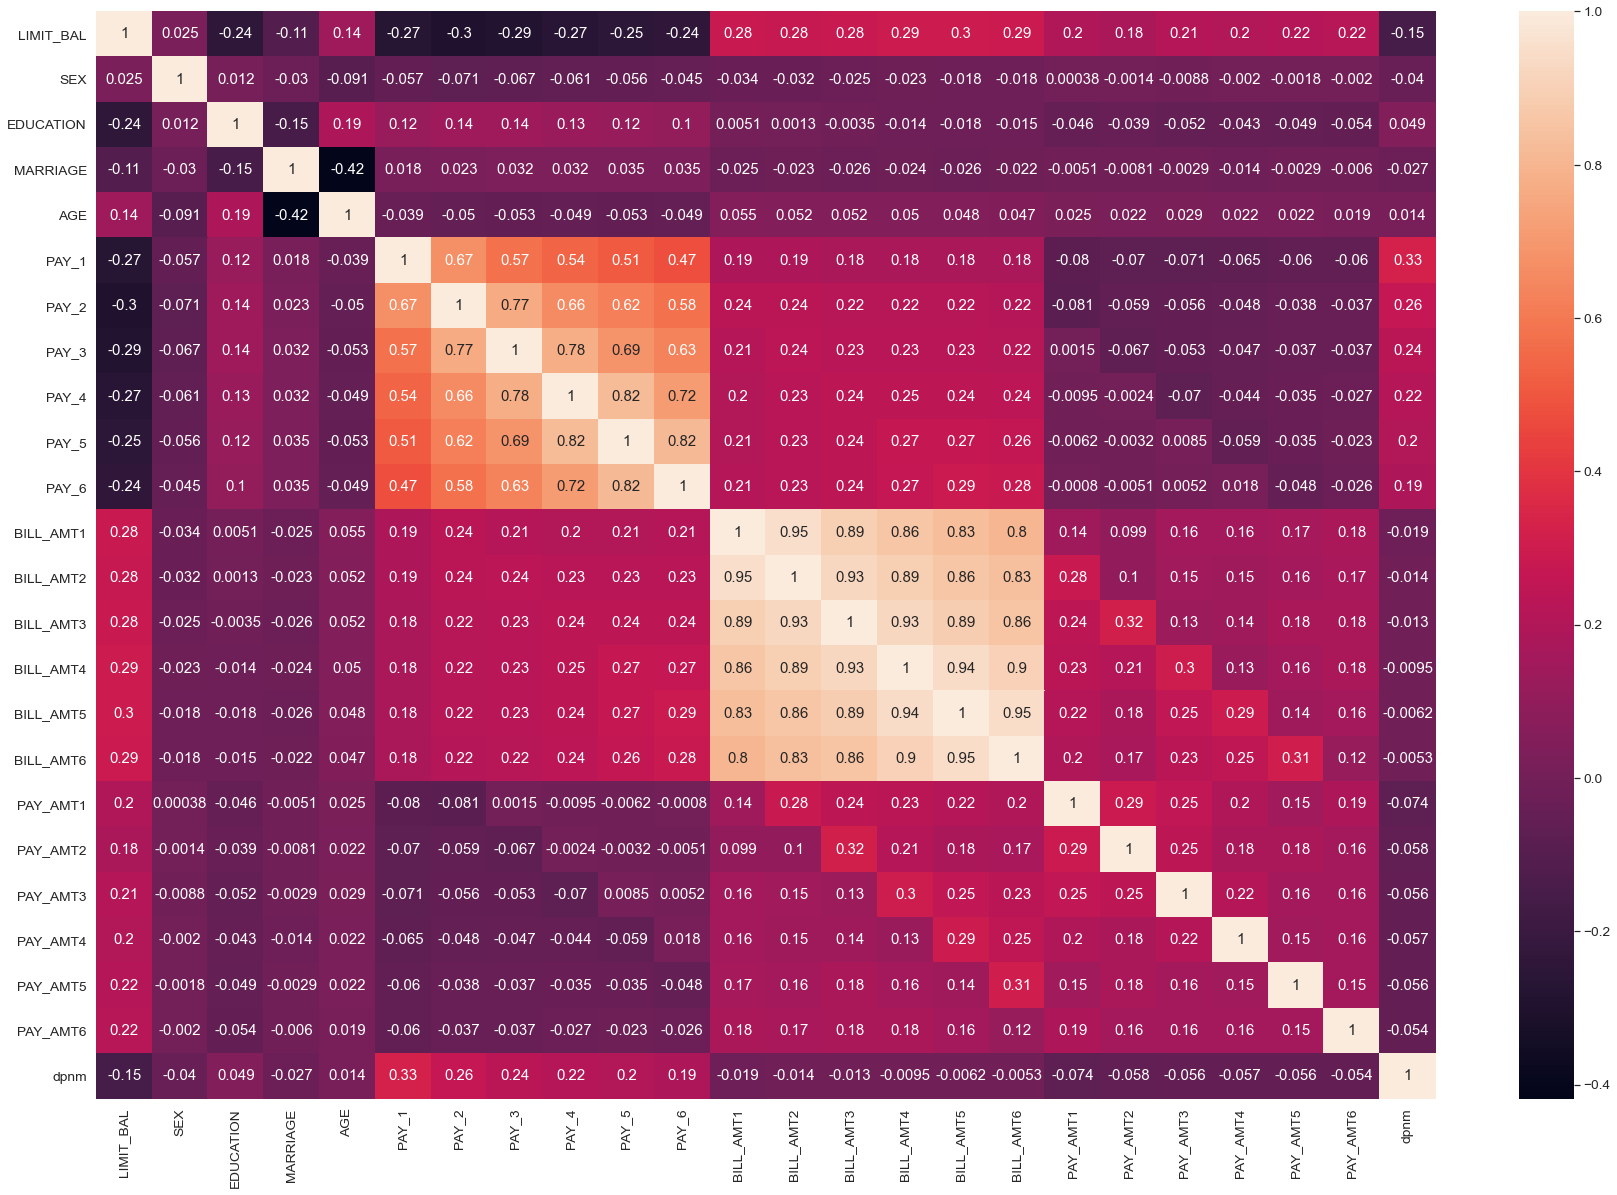

In [151]:
plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

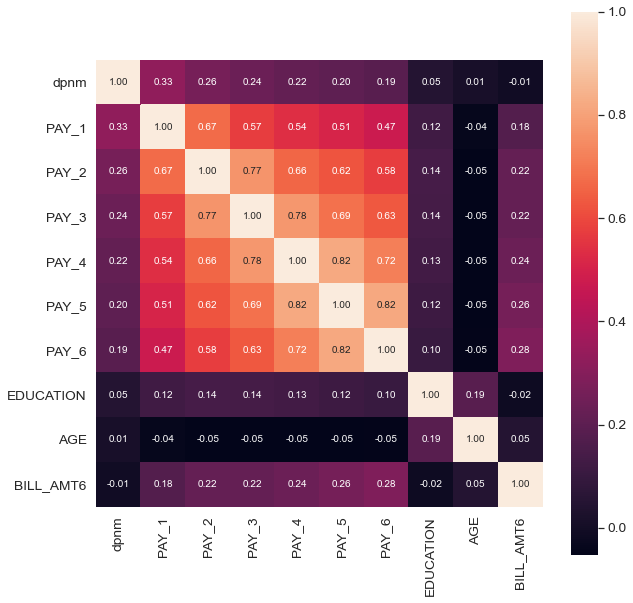

In [152]:
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'dpnm')['dpnm'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<frame>
Comme nous pouvons le voir, la prédiction par défaut du mois prochain dépend du statut de remboursement des six derniers mois de toutes les fonctionnalités qui nous sont données.

Mais il existe une multicolinéarité entre les fonctionnalités du statut de remboursement


Nous allons d'abord entraîner le modèle avec toutes les fonctionnalités et essayer de réduire les fonctionnalités non importantes.
</frame>

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  29601 non-null  int64   
 1   SEX        29601 non-null  int64   
 2   EDUCATION  29601 non-null  int64   
 3   MARRIAGE   29601 non-null  int64   
 4   AGE        29601 non-null  int64   
 5   PAY_1      29601 non-null  int64   
 6   PAY_2      29601 non-null  int64   
 7   PAY_3      29601 non-null  int64   
 8   PAY_4      29601 non-null  int64   
 9   PAY_5      29601 non-null  int64   
 10  PAY_6      29601 non-null  int64   
 11  BILL_AMT1  29601 non-null  int64   
 12  BILL_AMT2  29601 non-null  int64   
 13  BILL_AMT3  29601 non-null  int64   
 14  BILL_AMT4  29601 non-null  int64   
 15  BILL_AMT5  29601 non-null  int64   
 16  BILL_AMT6  29601 non-null  int64   
 17  PAY_AMT1   29601 non-null  int64   
 18  PAY_AMT2   29601 non-null  int64   
 19  PAY_AMT3   29601 non-null

In [154]:
data.shape

(29601, 25)

### LOGISTIC REGRESSION

In [155]:
X = data.drop(['dpnm','AGE_BIN'], axis=1)
y = data.dpnm

In [156]:
print(X.shape)
print(y.shape)

(29601, 23)
(29601,)


In [157]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### SPLIT DATA

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify = y)
#avec stratify

In [159]:
model1 = LogisticRegression(random_state=10)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))


Accuracy Score for model1:  0.776558013849012


C:\Users\kais\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


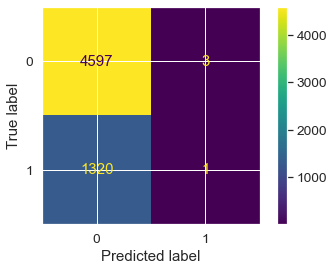

In [160]:
plot_confusion_matrix(model1,X_test,y_test)

In [161]:
print(metrics.classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4600
           1       0.25      0.00      0.00      1321

    accuracy                           0.78      5921
   macro avg       0.51      0.50      0.44      5921
weighted avg       0.66      0.78      0.68      5921



<frame>
Nous évaluons maintenant en supprimant les variables de multicolinéarité et en ne conservant que la variable PAY_1
</frame>

In [162]:
X = data.drop(['dpnm','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
y = data.dpnm

### SPLIT DATA

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify = y)
#avec stratify

In [164]:
model2 = LogisticRegression(random_state=10)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))


Accuracy Score for model1:  0.7770646850194224


C:\Users\kais\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<frame>
Comme nous pouvons le voir, même maintenant,la précision ne change pas 
</frame>

In [165]:
X = data[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
y = data.dpnm

### SPLIT DATA

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify = y)
#avec stratify

In [167]:
model3 = LogisticRegression(random_state=10)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
y_train_pred = model3.predict(X_train)

#print(classification_report(y_pred, y_test,digits=6))
#print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model1: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))


Test Accuracy Score for model1:  0.7768957946292856

Train Accuracy Score for model4:  0.7768581081081081


### RANDOM FOREST 

In [186]:
rf_model = RandomForestClassifier(random_state = 42)

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_rf))

Test Accuracy:  0.7711535213646343


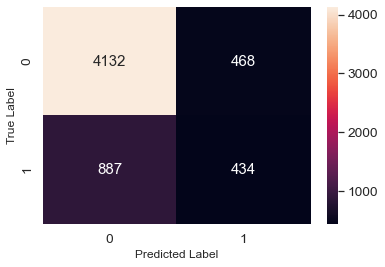

In [187]:
rf_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

ROC_AUC:  0.7359072507652304


ValueError: x and y must have same first dimension, but have shapes (397,) and (2002,)

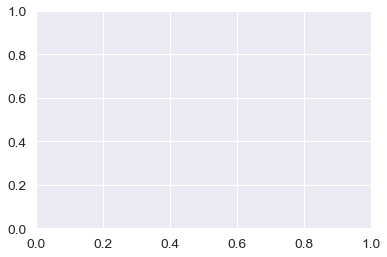

In [190]:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]

rf_roc_auc = metrics.roc_auc_score(y_test, rf_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba)

plt.plot(rf_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % rf_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [191]:
print(metrics.classification_report(y_test, pred_rf, labels = [0, 1]))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4600
           1       0.48      0.33      0.39      1321

    accuracy                           0.77      5921
   macro avg       0.65      0.61      0.62      5921
weighted avg       0.75      0.77      0.75      5921



In [171]:
### CATBOOST

In [173]:
categorical_ft_base = ['SEX', 'EDUCATION', 'MARRIAGE']

cat_model = CatBoostClassifier (random_state = 42, eval_metric = 'AUC')
cat_model.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_test,y_test)], cat_features = categorical_ft_base)
pred_cat = cat_model.predict(X_test)

Learning rate set to 0.069244
0:	test: 0.7164519	best: 0.7164519 (0)	total: 86.1ms	remaining: 1m 26s
1:	test: 0.7193798	best: 0.7193798 (1)	total: 165ms	remaining: 1m 22s
2:	test: 0.7201545	best: 0.7201545 (2)	total: 272ms	remaining: 1m 30s
3:	test: 0.7212075	best: 0.7212075 (3)	total: 334ms	remaining: 1m 23s
4:	test: 0.7189438	best: 0.7212075 (3)	total: 383ms	remaining: 1m 16s
5:	test: 0.7179128	best: 0.7212075 (3)	total: 458ms	remaining: 1m 15s
6:	test: 0.7167348	best: 0.7212075 (3)	total: 553ms	remaining: 1m 18s
7:	test: 0.7159370	best: 0.7212075 (3)	total: 633ms	remaining: 1m 18s
8:	test: 0.7155535	best: 0.7212075 (3)	total: 728ms	remaining: 1m 20s
9:	test: 0.7155174	best: 0.7212075 (3)	total: 804ms	remaining: 1m 19s
10:	test: 0.7155174	best: 0.7212075 (3)	total: 833ms	remaining: 1m 14s
11:	test: 0.7180789	best: 0.7212075 (3)	total: 931ms	remaining: 1m 16s
12:	test: 0.7189803	best: 0.7212075 (3)	total: 1.01s	remaining: 1m 16s
13:	test: 0.7185759	best: 0.7212075 (3)	total: 1.12s	rem

In [175]:
print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_cat))

Test Accuracy:  0.8187806113832123


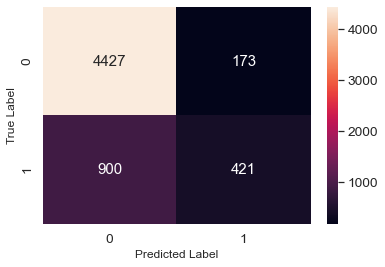

In [176]:

cat_confusion_matrix = metrics.confusion_matrix(y_test, pred_cat)
sns.heatmap(cat_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [179]:
print(metrics.classification_report(y_test, pred_cat, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4600
           1       0.71      0.32      0.44      1321

    accuracy                           0.82      5921
   macro avg       0.77      0.64      0.67      5921
weighted avg       0.80      0.82      0.79      5921



ROC_AUC:  0.7359072507652304


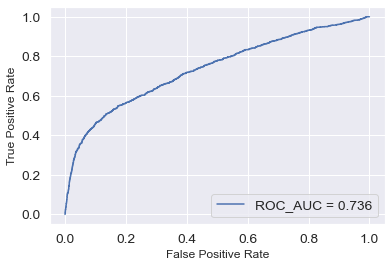

In [181]:
cat_pred_proba = cat_model.predict_proba(X_test)[:,1]

cat_roc_auc = metrics.roc_auc_score(y_test, cat_pred_proba)
print('ROC_AUC: ', cat_roc_auc)

cat_fpr, cat_tpr, thresholds = metrics.roc_curve(y_test, cat_pred_proba)

plt.plot(cat_fpr,cat_tpr, label = 'ROC_AUC = %0.3f' % cat_roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [182]:
### WIll try added features now

In [183]:
X_new = X.copy().drop(pay_x_new, axis = 1)
X_new = X_new.drop(bill_amtx_bins, axis = 1)
X_new = X_new.drop(['AgeBin', 'LimitBin'], axis = 1)

X_new

NameError: name 'pay_x_new' is not defined